In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
pd.set_option("display.max_columns", 200)
colors=["plum","cyan","magenta", "teal", 'lime', 'cyan', 'indigo', 'tomato', 'gold', 'mediumpurple', 'darkorange', 'mediumslateblue', 'crimson', 'deeppink',"coral","yellow", "violet", "pink","grey", "blue","orange","brown", "red","green","gold", "olive","tan"]

In [2]:
df1=pd.read_csv("/home/heewa/Desktop/crash_data/crash_data.csv",low_memory=False)

In [3]:
df1.shape

(170604, 43)

In [4]:
df1.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,07/17/2023 10:45:00 AM,County,SELFRIDGE RD,County,RANDOLPH RD,NaN,NaN,NaN,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,UNKNOWN,NaN,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,Yes,NO APPARENT INJURY,NaN,INATTENTIVE OR LOST IN THOUGHT,MD,8B61B8E0-5473-4C78-A654-6029684ABD03,SUPERFICIAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,East,East,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)"
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,07/20/2023 11:40:00 PM,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,NaN,NaN,NaN,OTHER,NaN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NaN,NaN,E611A3F8-5F7D-465B-8DE0-3814027998F1,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,1A592482-AF1F-49CE-8554-77EF7C55966B,SUPERFICIAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,South,East,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)"
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,07/13/2023 05:40:00 PM,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,NaN,NaN,NaN,SAME DIR REAR END,NaN,DRY,DAYLIGHT,NO CONTROLS,NaN,NaN,3C7F6951-1701-44DC-9824-88DF4E32352E,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,C2EF337E-5881-48ED-9B06-36D0BE00557C,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,"MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4...",MOVING CONSTANT SPEED,Unknown,Unknown,25,No,No,2001,KENWORTH,TRUCK,NaN,39.149085,-77.210731,"(39.14908542, -77.21073135)"


In [5]:
df1.sample(5)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
35479,MCP1221002R,16057769,Montgomery County Police,Property Damage Crash,11/09/2016 10:29:00 AM,Municipality,ODENDHAL AVE,Maryland (State),FREDERICK RD,NaN,NaN,NaN,SAME DIR REAR END,CLOUDY,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,E52F1B75-C1E8-4B08-AD81-A08FB8608220,No,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,82DF5F5B-E340-4290-942A-034DDDEF3B59,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,TRANSIT BUS,SLOWING OR STOPPING,West,West,35,No,No,2008,GILL,BUS,NO MISUSE,39.148885,-77.206453,"(39.148885, -77.20645333)"
143555,MCP2201000P,16010682,MONTGOMERY,Property Damage Crash,03/03/2016 05:31:00 PM,County,FENTON ST,County,THAYER AVE,NaN,NaN,NaN,SAME DIRECTION LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,A41BAF32-CA67-4959-A3D3-9EF5347D332D,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,DC,44946447-0260-433D-8DAA-1734DF53365C,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PASSING,South,South,30,No,No,2004,CADI,4D,NO MISUSE,38.993038,-77.024095,"(38.99303838, -77.02409506)"
2973,EJ7895004C,230054455,Gaithersburg Police Depar,Property Damage Crash,09/12/2023 01:30:00 PM,Municipality,ODENDHAL AVE,Municipality,RUSSELL AVE,NaN,GAITHERSBURG,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,C508EEBC-0D0F-455D-9D56-8C6C2B1C4CEC,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,4C8C28CE-2EC0-452B-BCBD-C2876C83CFCE,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,West,West,35,No,No,2016,TOYOTA,CAMRY,NO MISUSE,39.150507,-77.204110,"(39.15050667, -77.20411047)"
54749,MCP3223000P,200019019,Montgomery County Police,Injury Crash,05/10/2020 09:22:00 PM,Maryland (State),GEORGIA AVE,County,BALLARD ST,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NaN,NONE DETECTED,NaN,ED2552CA-09FE-4BE4-91A9-C0CD89B5E298,Yes,NO APPARENT INJURY,NaN,DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT,MD,A9651132-B5DB-459E-AC54-7B8943068C6D,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,TRANSIT BUS,MOVING CONSTANT SPEED,West,North,35,No,No,2006,TRANSIT,BUS,NO MISUSE,39.001269,-77.034139,"(39.00126898, -77.03413881)"
135904,MCP10200046,190011965,Montgomery County Police,Injury Crash,03/15/2019 11:23:00 AM,County,BARNESVILLE RD,County,PEACH TREE RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,NaN,FF4EE397-D1AA-40B4-BD42-DA25B3D17E15,No,POSSIBLE INJURY,NaN,UNKNOWN,MD,60E1FAF1-E469-4692-9726-0EE4DB1FE84D,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,West,West,40,No,No,2010,HYUN,TK,NO MISUSE,39.215543,-77.356248,"(39.215543, -77.35624817)"


In [6]:
df1.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
df1.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

In [8]:
df1.describe(include="all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
count,170604,170604,170604,170604,170604,153765,154790,153732,154776,15812,18947,5422,170030,157350,150646,169188,145316,139546,4287,170604,170604,170604,30999,170604,160767,170604,170291,170448,170348,167980,170225,167942,167942,170604.000000,170604,170604,170604.000000,170580,170538,136672,170604.000000,170604.000000,170604
unique,95987,95885,10,3,93662,10,3791,10,6671,11221,20,12,18,12,11,8,11,11,15,170604,3,5,197,19,74,170604,7,16,16,30,22,5,5,NaN,2,2,NaN,1868,6652,10,NaN,NaN,95154
top,MCP229800RC,200022715,Montgomery County Police,Property Damage Crash,12/10/2018 06:10:00 PM,Maryland (State),GEORGIA AVE,County,GEORGIA AVE,PARKING LOT,ROCKVILLE,PEDESTRIAN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NONE DETECTED,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,North,NaN,No,No,NaN,TOYOTA,4S,NO MISUSE,NaN,NaN,"(38.953, -77.338)"
freq,10,10,137085,108438,11,76394,10786,84739,2096,132,9236,3847,55319,115799,119586,115426,68001,121467,3834,1,91634,139933,12019,105841,141609,1,61776,67389,67145,118028,66566,46441,47232,NaN,169868,167942,NaN,22963,13682,122312,NaN,NaN,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.550028,NaN,NaN,1966.381785,NaN,NaN,NaN,39.083072,-77.112348,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.059808,NaN,NaN,340.687251,NaN,NaN,NaN,0.072046,0.098564,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,2006.000000,NaN,NaN,NaN,39.024294,-77.189252,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,39.074923,-77.105429,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,39.139708,-77.039628,NaN


**Data Preparation:** 
- Dropping irrelevant columns and rows
- Identifying duplicated columns and missing values
- Renaming Columns
- Feature Creation
  

In [9]:
#Missing values
print("Missing values for each column:\n",df1.isna().sum() )

Missing values for each column:
 Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16839
Road Name                          15814
Cross-Street Type                  16872
Cross-Street Name                  15828
Off-Road Description              154792
Municipality                      151657
Related Non-Motorist              165182
Collision Type                       574
Weather                            13254
Surface Condition                  19958
Light                               1416
Traffic Control                    25288
Driver Substance Abuse             31058
Non-Motorist Substance Abuse      166317
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      139605
Driver Distracted By    

In [10]:
#Dropping unwanted columns
df=df1[[#'Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', #'Route Type', #'Road Name', 
       #'Cross-Street Type',
       #'Cross-Street Name', 'Off-Road Description', #'Municipality',
       #'Related Non-Motorist',
       'Collision Type',# 'Weather',
       #'Surface Condition',
       # 'Light', #'Traffic Control',
       #'Driver Substance Abuse', 'Non-Motorist Substance Abuse', #'Person ID',
       'Driver At Fault', 'Injury Severity', #'Circumstance',
       'Driver Distracted By', #'Drivers License State', #'Vehicle ID',
       'Vehicle Damage Extent', #'Vehicle First Impact Location',
       #'Vehicle Second Impact Location', 
       'Vehicle Body Type',
       'Vehicle Movement', #'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', #'Equipment Problems', 
       'Latitude',
       'Longitude', 'Location']].copy()
print(df.columns)

Index(['Crash Date/Time', 'Collision Type', 'Driver At Fault',
       'Injury Severity', 'Driver Distracted By', 'Vehicle Damage Extent',
       'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


In [11]:
#Renaming columns
df=df.rename(columns={ 
    "Crash Date/Time":"Crash_Date_Time",
    "Route Type":"Route_Type",
    "Driver At Fault":"Driver_At_Fault",
    "Injury Severity":"Injury_Severity",
    "Driver Distracted By":"Driver_Distracted_By", 
    "Vehicle Damage Extent":"Vehicle_Damage_Extent",
    "Vehicle Body Type":"Vehicle_Body_Type",
    "Vehicle Movement":"Vehicle_Movement", 
    "Speed Limit":"Speed_Limit", 
    "Driverless Vehicle":"Driverless_Vehicle",
    "Parked Vehicle":"Parked_Vehicle",
    "Vehicle Year":"Vehicle_Year", 
    "Vehicle Make":"Vehicle_Make",
    "Vehicle Model":"Vehicle_Model",
    "Collision Type":"Collision_Type"
}) 
df.columns

Index(['Crash_Date_Time', 'Collision_Type', 'Driver_At_Fault',
       'Injury_Severity', 'Driver_Distracted_By', 'Vehicle_Damage_Extent',
       'Vehicle_Body_Type', 'Vehicle_Movement', 'Speed_Limit',
       'Driverless_Vehicle', 'Parked_Vehicle', 'Vehicle_Year', 'Vehicle_Make',
       'Vehicle_Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [12]:
#Missing values
df.isna().sum() 

Crash_Date_Time             0
Collision_Type            574
Driver_At_Fault             0
Injury_Severity             0
Driver_Distracted_By        0
Vehicle_Damage_Extent     313
Vehicle_Body_Type        2624
Vehicle_Movement          379
Speed_Limit                 0
Driverless_Vehicle          0
Parked_Vehicle              0
Vehicle_Year                0
Vehicle_Make               24
Vehicle_Model              66
Latitude                    0
Longitude                   0
Location                    0
dtype: int64

In [13]:
# Checking for columns with no missing values
df.columns[~df.isna().any()]
  

Index(['Crash_Date_Time', 'Driver_At_Fault', 'Injury_Severity',
       'Driver_Distracted_By', 'Speed_Limit', 'Driverless_Vehicle',
       'Parked_Vehicle', 'Vehicle_Year', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [14]:
# Checking for columns with missing values
df.columns[df.isna().any()]

Index(['Collision_Type', 'Vehicle_Damage_Extent', 'Vehicle_Body_Type',
       'Vehicle_Movement', 'Vehicle_Make', 'Vehicle_Model'],
      dtype='object')

In [15]:
#Checking for duplicated values
df.loc[df.duplicated()]#gives all rows that have duplicate

,Crash_Date_Time,Collision_Type,Driver_At_Fault,Injury_Severity,Driver_Distracted_By,Vehicle_Damage_Extent,Vehicle_Body_Type,Vehicle_Movement,Speed_Limit,Driverless_Vehicle,Parked_Vehicle,Vehicle_Year,Vehicle_Make,Vehicle_Model,Latitude,Longitude,Location
65984,11/28/2018 08:15:00 PM,SAME DIR REAR END,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,No,2018,TOYOTA,RAV4,39.011057,-77.001608,"(39.01105667, -77.00160833)"
84964,11/08/2022 01:27:00 PM,SAME DIR REAR END,No,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,PASSENGER CAR,STOPPED IN TRAFFIC LANE,40,No,No,2022,CHEV,UT,39.111005,-77.037188,"(39.111005, -77.03718833)"
85518,08/10/2016 04:48:00 PM,SAME DIR REAR END,No,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,PASSENGER CAR,STOPPED IN TRAFFIC LANE,35,No,No,2015,TOYOTA,COROLLA,39.086005,-77.149087,"(39.086005, -77.14908667)"
96094,05/09/2021 03:16:00 AM,OTHER,Unknown,NO APPARENT INJURY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,35,No,No,0,UNKNOWN,UNKNOWN,38.988487,-76.987865,"(38.98848667, -76.987865)"
111809,11/28/2021 01:20:00 PM,OTHER,No,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,DISABLING,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,35,No,No,2018,HOND,TK,39.148316,-77.206712,"(39.1483165, -77.2067125)"
113110,06/19/2016 10:00:00 PM,HEAD ON,Yes,NO APPARENT INJURY,UNKNOWN,DISABLING,PASSENGER CAR,ACCELERATING,30,No,No,1997,MAZDA,CV,39.047034,-77.036543,"(39.04703425, -77.03654319)"
125828,12/17/2016 02:45:00 PM,SAME DIRECTION SIDESWIPE,Yes,NO APPARENT INJURY,UNKNOWN,FUNCTIONAL,NaN,MOVING CONSTANT SPEED,35,No,No,0,UNKNOWN,UNKNOWN,39.008195,-77.040003,"(39.008195, -77.04000333)"
147350,12/06/2022 02:49:00 PM,SAME DIRECTION SIDESWIPE,Unknown,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,SCHOOL BUS,MOVING CONSTANT SPEED,5,No,No,2022,THMS,BU,39.079865,-77.146184,"(39.07986476, -77.1461838)"
161544,05/09/2019 02:39:00 PM,OTHER,Yes,NO APPARENT INJURY,NOT DISTRACTED,NaN,NaN,ACCELERATING,0,No,No,0,UNKNOWN,UNKNOWN,39.043521,-77.173418,"(39.043521, -77.173418)"


In [16]:
df_HOND=df.query('Vehicle_Make=="HOND"')# is used to filter rows based on HOND in the Vehicle_Make column
print(df_HOND.loc[df_HOND.duplicated(keep=False)])

               Crash_Date_Time Collision_Type Driver_At_Fault  \
12296   11/28/2021 01:20:00 PM          OTHER              No   
111809  11/28/2021 01:20:00 PM          OTHER              No   

           Injury_Severity    Driver_Distracted_By Vehicle_Damage_Extent  \
12296   NO APPARENT INJURY  LOOKED BUT DID NOT SEE             DISABLING   
111809  NO APPARENT INJURY  LOOKED BUT DID NOT SEE             DISABLING   

              Vehicle_Body_Type  Vehicle_Movement  Speed_Limit  \
12296   (SPORT) UTILITY VEHICLE  MAKING LEFT TURN           35   
111809  (SPORT) UTILITY VEHICLE  MAKING LEFT TURN           35   

       Driverless_Vehicle Parked_Vehicle  Vehicle_Year Vehicle_Make  \
12296                  No             No          2018         HOND   
111809                 No             No          2018         HOND   

       Vehicle_Model   Latitude  Longitude                   Location  
12296             TK  39.148316 -77.206712  (39.1483165, -77.2067125)  
111809            

In [17]:
# Removing duplicate
df=df.loc[~df.duplicated()].reset_index(drop=True).copy()
print(df.shape)

(170595, 17)


In [18]:
# Changing the data type from object to datetime for the 'Crash_Date_Time' column

df['Crash_Date_Time']=pd.to_datetime(df["Crash_Date_Time"])
print("Crash_Date_Time dtype:",df['Crash_Date_Time'].dtypes)

/tmp/ipykernel_14706/3445026137.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Crash_Date_Time']=pd.to_datetime(df["Crash_Date_Time"])


Crash_Date_Time dtype: datetime64[ns]


In [19]:
#Extracting datetime components from the Crash_Date_Time column
df["Year"]=df['Crash_Date_Time'].dt.year
df["Month"]=df['Crash_Date_Time'].dt.month
df["Day_of_Week"]=df['Crash_Date_Time'].dt.day_name()
df["Hour"]=df['Crash_Date_Time'].dt.hour
print(df[["Crash_Date_Time", "Year", "Month", "Day_of_Week", "Hour"]].head())

      Crash_Date_Time  Year  Month Day_of_Week  Hour
0 2019-05-31 15:00:00  2019      5      Friday    15
1 2019-05-24 17:00:00  2019      5      Friday    17
2 2023-07-17 10:45:00  2023      7      Monday    10
3 2023-07-20 23:40:00  2023      7    Thursday    23
4 2023-07-13 17:40:00  2023      7    Thursday    17


In [20]:
df.columns

Index(['Crash_Date_Time', 'Collision_Type', 'Driver_At_Fault',
       'Injury_Severity', 'Driver_Distracted_By', 'Vehicle_Damage_Extent',
       'Vehicle_Body_Type', 'Vehicle_Movement', 'Speed_Limit',
       'Driverless_Vehicle', 'Parked_Vehicle', 'Vehicle_Year', 'Vehicle_Make',
       'Vehicle_Model', 'Latitude', 'Longitude', 'Location', 'Year', 'Month',
       'Day_of_Week', 'Hour'],
      dtype='object')

In [21]:
df.describe() # Summary information on the numeric columns

,Crash_Date_Time,Speed_Limit,Vehicle_Year,Latitude,Longitude,Year,Month,Hour
count,170595,170595.000000,170595.000000,170595.000000,170595.000000,170595.000000,170595.000000,170595.000000
mean,2019-04-08 18:33:26.097951488,32.550251,1966.414643,39.083073,-77.112349,2018.754067,6.682107,13.345930
min,2015-01-01 00:30:00,0.000000,0.000000,37.720000,-79.486000,2015.000000,1.000000,0.000000
25%,2017-01-11 15:23:00,25.000000,2006.000000,39.024295,-77.189255,2017.000000,4.000000,9.000000
50%,2019-01-14 14:16:00,35.000000,2011.000000,39.074923,-77.105430,2019.000000,7.000000,14.000000
75%,2021-08-06 05:14:00,40.000000,2015.000000,39.139711,-77.039628,2021.000000,10.000000,17.000000
max,2023-12-06 21:54:00,75.000000,9999.000000,39.990414,-75.527708,2023.000000,12.000000,23.000000
std,NaN,11.059580,340.596302,0.072047,0.098565,2.577128,3.450580,5.262939


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170595 entries, 0 to 170594
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Crash_Date_Time        170595 non-null  datetime64[ns]
 1   Collision_Type         170021 non-null  object        
 2   Driver_At_Fault        170595 non-null  object        
 3   Injury_Severity        170595 non-null  object        
 4   Driver_Distracted_By   170595 non-null  object        
 5   Vehicle_Damage_Extent  170283 non-null  object        
 6   Vehicle_Body_Type      167973 non-null  object        
 7   Vehicle_Movement       170216 non-null  object        
 8   Speed_Limit            170595 non-null  int64         
 9   Driverless_Vehicle     170595 non-null  object        
 10  Parked_Vehicle         170595 non-null  object        
 11  Vehicle_Year           170595 non-null  int64         
 12  Vehicle_Make           170571 non-null  obje

In [23]:
#Sorting df based on 'Crash_Date_Time' column
df=df.sort_values(by='Crash_Date_Time',ascending=False).reset_index(drop=True) 
df.head()

,Crash_Date_Time,Collision_Type,Driver_At_Fault,Injury_Severity,Driver_Distracted_By,Vehicle_Damage_Extent,Vehicle_Body_Type,Vehicle_Movement,Speed_Limit,Driverless_Vehicle,Parked_Vehicle,Vehicle_Year,Vehicle_Make,Vehicle_Model,Latitude,Longitude,Location,Year,Month,Day_of_Week,Hour
0,2023-12-06 21:54:00,HEAD ON,No,NO APPARENT INJURY,NOT DISTRACTED,DESTROYED,PASSENGER CAR,ACCELERATING,50,No,No,2015,HOND,SD,39.158013,-77.192055,"(39.15801333, -77.192055)",2023,12,Wednesday,21
1,2023-12-06 21:54:00,HEAD ON,Yes,NO APPARENT INJURY,TALKING OR LISTENING TO CELLULAR PHONE,DESTROYED,PASSENGER CAR,ACCELERATING,50,No,No,2018,HOND,4S,39.158013,-77.192055,"(39.15801333, -77.192055)",2023,12,Wednesday,21
2,2023-12-06 19:05:00,SAME DIRECTION RIGHT TURN,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,SUPERFICIAL,PASSENGER CAR,MAKING RIGHT TURN,25,No,No,2022,NFLY,548,38.985911,-77.094933,"(38.98591127, -77.09493278)",2023,12,Wednesday,19
3,2023-12-06 17:53:00,SAME DIRECTION SIDESWIPE,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,FUNCTIONAL,PASSENGER CAR,MAKING LEFT TURN,35,No,No,2018,BMW,330I,39.090122,-77.044890,"(39.09012167, -77.04489)",2023,12,Wednesday,17
4,2023-12-06 17:53:00,SAME DIRECTION SIDESWIPE,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PASSENGER CAR,MAKING RIGHT TURN,35,No,No,2017,FORD,ESCAPE,39.090122,-77.044890,"(39.09012167, -77.04489)",2023,12,Wednesday,17


**Feature Understanding**
  plotting Feature Distribution(potential outliers are detected)
     Histogram
     KDE
     Boxplot

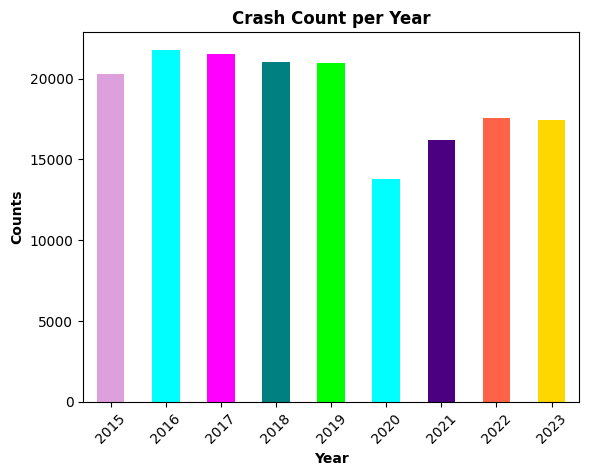

In [24]:
ax=df["Year"].value_counts().sort_index()\
      .plot(kind="bar", color=colors)
ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Counts", weight="bold")
plt.title("Crash Count per Year",weight="bold") 
plt.xticks(rotation=45)
plt.show()

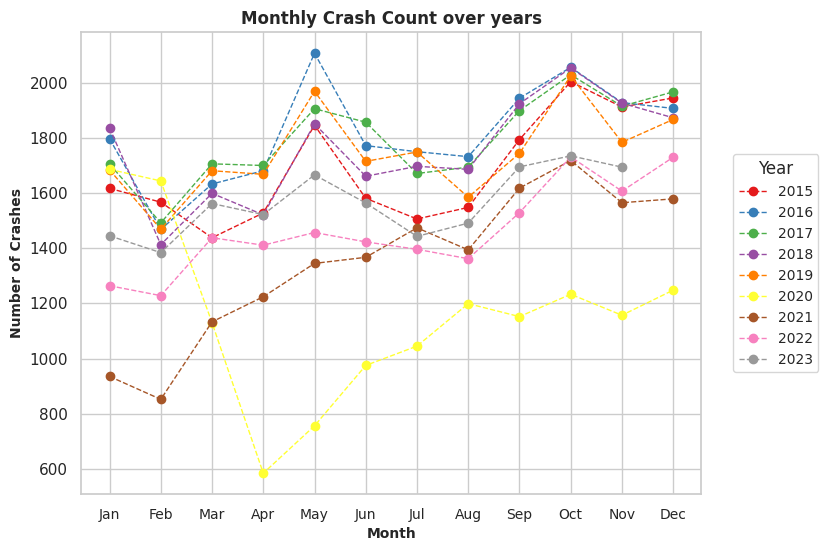

In [25]:
monthly_crashes_df=df.groupby(["Year","Month"]).size().reset_index(name="Crash Count")
monthly_crashes_df=monthly_crashes_df[~((monthly_crashes_df["Year"]==2023)&(monthly_crashes_df["Month"]==12))]#removing December 2023 values due to data deficiency
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
palette=sns.color_palette("Set1",n_colors=len(monthly_crashes_df["Year"].unique()))
for i,year in enumerate(monthly_crashes_df["Year"].unique()):
    year_data=monthly_crashes_df[monthly_crashes_df["Year"]==year] #Creating a subset of data related to specific year
    plt.plot(year_data["Month"],year_data["Crash Count"],label=str(year),marker="o",linestyle="--", linewidth=1,color=palette[i])
plt.xlabel("Month",fontsize="small",weight="bold")
plt.ylabel("Number of Crashes",fontsize="small",weight="bold")
plt.legend(title="Year", loc="center right", fontsize="small", bbox_to_anchor=(1.2,0.5))
plt.xticks(range(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov","Dec"],fontsize="small")
plt.title("Monthly Crash Count over years",weight="bold")
plt.show()  

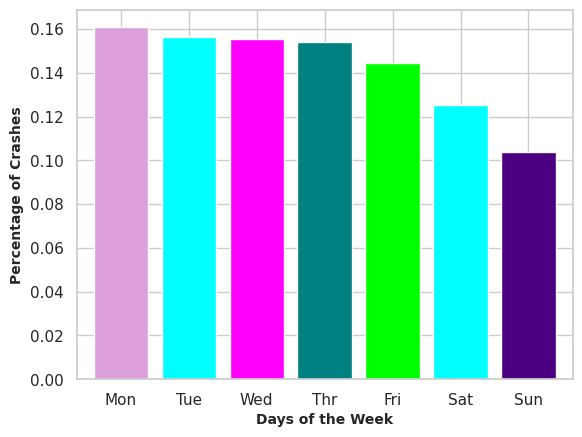

In [26]:
day_data_df=df["Day_of_Week"].value_counts(normalize=True).reset_index(name="Crash_Percentage")
#day_data_df["Crash_Percentage"]*=100
day_data_df.plot(kind="bar", x="Day_of_Week",y="Crash_Percentage",color=colors,width=0.8)

plt.xlabel("Days of the Week",fontsize="small",weight="bold")
plt.ylabel("Percentage of Crashes",fontsize="small",weight="bold")
plt.xticks(range(7),["Mon","Tue","Wed","Thr","Fri","Sat","Sun"],rotation=0)
plt.legend().set_visible(False)
plt.show()
                 

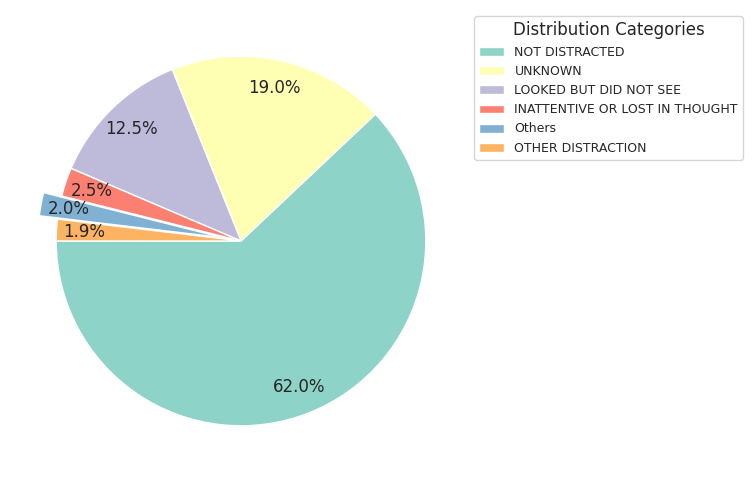

In [38]:
# Identifying distractions with counts below 1000
driver_distraction_counts = df["Driver_Distracted_By"].value_counts()
below_1000_distractions = driver_distraction_counts[driver_distraction_counts < 1000].index

# Creating a new category "Other" for distractions below 1000 using conditions
df['Categorized_Distraction'] = df['Driver_Distracted_By'].where(~df['Driver_Distracted_By'].isin(below_1000_distractions), 'Others')

# Calculating percentages after categorizing
percentage_counts = df['Categorized_Distraction'].value_counts(normalize=True) * 100
color_n=plt.cm.Set3.colors

plt.figure(figsize=(6,6))
explode=[0.1 if cat=="Others" else 0 for cat in percentage_counts.index]
plt.pie(percentage_counts, labels=None, autopct="%1.1f%%", startangle=180,pctdistance=0.85,rotatelabels=True, explode=explode,colors=color_n)
plt.legend(percentage_counts.index, title="Distribution Categories",fontsize=9, loc="upper right", bbox_to_anchor=(1.6,1))
plt.show()

In [28]:
df["Vehicle_Model"].nunique()

6652

In [29]:
df["Vehicle_Make"].unique()[:10]

array(['HOND', 'NFLY', 'BMW', 'FORD', 'NISSAN', 'CHEVROLET', 'RAM',
       'HONDA', 'VOLK', 'KIA'], dtype=object)

In [41]:
from fuzzywuzzy import fuzz
from collections import defaultdict

#  Identifying similar names
def find_similar_names(name, names_list):
    similar_names = []
    for unique_name in names_list:
        if isinstance(name, str) and isinstance(unique_name, str):
            similarity_ratio = fuzz.ratio(name, unique_name)
            if similarity_ratio > 80:
                similar_names.append(unique_name)
    return similar_names

# Createing a mapping dictionary
similar_names_dict = {}
unique_vehicle_makes = df["Vehicle_Make"].astype(str).unique()

for make in unique_vehicle_makes:
  
    similar_names_dict.setdefault(make, [])
    
    similar_names = find_similar_names(make, unique_vehicle_makes)
    
    similar_names_dict[make].extend(similar_names) # Extending the list of similar names for this make
    
#print(similar_names_dict )

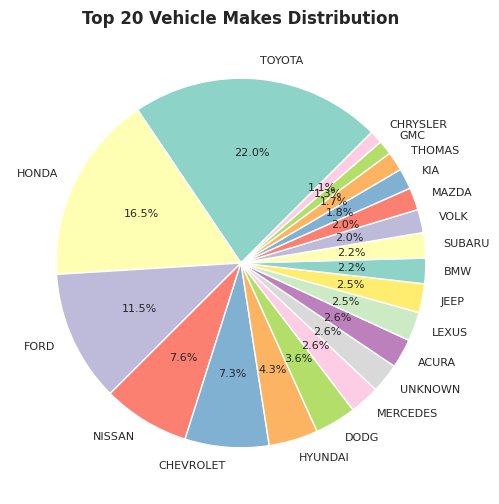

In [39]:
#unique_vehicle_makes = ['RAM', 'RIVIAN', 'GMC', 'BUICK', 'ESCALADE', 'GM', 'FISKER', 'ODB', 'VW', 'C-HR', 'NEW', 'KNEW', 'TBU', 'TUBU', 'PIRC', 'PIERCE', 'FERRARI', 'GATOR', 'GATO', 'WHITE', 'POSTAL', 'UU', 'OTHR', 'OTHER', 'IC BU', 'IC BUS', 'MCI', 'MCIN', 'GIUIG', 'SANYOU HOLDING GROUP', 'PREVOST', 'PREVO', 'WSTR', 'WSTRG', 'STR', 'KW', 'KENW', 'KEN', 'ICRP', 'NWFL', 'GILB', 'CABO', 'PIERCE MANUFACTURING', 'SAA', 'SAAB', 'POLESTAR', 'MIFU', 'BUS', 'VOVL', 'HUMMER', 'FIRE', 'FRE', 'EPO', 'MB', 'MITZ', 'ROV', 'SCHOOL', 'NABI', 'FIAT', 'MAKE', 'PIERCE', 'PEIRCE', 'nan', 'BU', 'SSR', 'SSRY', 'METRO', 'GMV', 'JOHN DEERE', 'NAVISTAR', 'CRIMSON', 'CHRIMSON', 'RIMSON', 'JEEP', 'CAT', 'CATE', 'HD', 'ORDD', 'FRHT (CHASSIS/THOMAS)', 'HSB', 'AUTO', 'INTER', 'ALTIMA', 'MORGAN', 'NINGBO', 'MOTO', 'SOUT', 'GILG BUS', 'ZHEJIANG RIYA MOTORC', 'LEXI', 'EMON', 'TRAILMASTER', 'UTILIMASTER', 'GENS', 'GEN', 'YUKON', 'FRNT', 'ZHEJIANG JIAJUE', 'SUBURBAN', 'MCPS', 'FTHT', 'AL', 'PIER', 'PIERS', 'WAB', 'SEAG', 'SAG', 'SIENNA', 'PTRP', 'GEO', 'IC', 'DUCATI', 'ACEPOWER', 'QMWHEEL', 'WHEEL', 'CCC', 'STRN', 'EMER', 'EMR', 'TRUCK', 'KABUTO', 'GRUMMLV', 'GENU', 'DOAGE', 'MASE', 'FLASH', 'GRADALL', 'HYBRID TRANSIT', 'JCB', 'CHEVROLET', 'GRUMMAN ALLIED', 'ZR900', 'TRANSIT', 'JIANGSU', 'FORE', 'FORF', 'FORN', 'FORK', 'MUSTANG', 'TPYPTA', 'LUCID', 'TIYITA', 'XXX', 'XXXX', 'TSMR', 'STER', 'STERL', 'STE', 'FTL', 'NOVABUS', 'METRO TRANSIT', 'MACK TRUCKS INC', 'CORPO', 'TRUM', 'USPS', 'UPS', 'FOOD', 'KAYO', 'CANA', 'GENE', 'GENIE', 'TRACKER', 'VAN', 'VANH', 'GRAY', 'SEAGRAVE', 'PROMASTER', 'MACL', 'MACJ', 'MARC', 'MACH', '2011', 'UK', '2014', 'PRCE', 'EXPLORER', 'PTRD', 'IHC', 'INTL TRUCK', 'INTL TK', 'NFWL', 'VERSA', 'BEAL', 'PRIUS', 'ELANTRA', 'FCA US', 'MAROON', 'SCION', 'GILLEM', 'GILLET', 'PLYM', 'TAO', 'FO', 'DODGE', 'FRG', 'FRIG', 'STOU', 'MER BENZ', 'BOX', 'KYMC', 'KYMCO', 'SPTN', 'CGHRUSYLER', 'DE4', 'KENWOOD', 'SATU', 'RIDE ON', 'RIDE-ON', 'LLV', 'STLG', 'VNHL', 'SMART', 'SMRT', 'SMAR', 'HYD', 'PIAG', 'FREI', 'FLY WING', 'T', 'MAIL TRUCK', 'MAILTRUCK', 'US MAIL TRUCK', 'SHADOW', 'KENT', 'INIF', 'US', 'NVAE', 'PUSH-MSDE-D-12', 'IC CORP', 'IC CORPORA', 'GENERAL ELECTRIC', 'THBT', 'HENO', 'SUZK', 'COROLLA', 'FBU', 'RANGE', 'RANG', 'ROYAL', 'ROYA', 'CHRV', 'CRV', 'FORESTER', 'HIRSCHBACH', 'AMTECH', 'WORKHORSE', 'WORK HORSE', 'US POSTAL', 'STCR', 'ROUGE', 'PLYMOUTH', 'PLMOTH', 'PLYMOTH', 'TREK', 'TRK', 'AUDI', 'TOW TRUCK', 'STRAIGHT', 'GMC/CHEVY', 'HUSQ', 'AMB', '4S', 'JUICE', 'AMGN', 'BMX', 'XX', 'MEDZ', 'KTM', 'H3', 'FCA', 'EDGE', 'MARIN', 'LANCE', 'CIVIC', 'WESTERN STAR TRUCKS', 'ROEN', 'HYOSUN', 'INER', 'HUY', 'CARO', 'CARGO', 'SEAGATE', 'LECUS', 'AIA', 'LONG', 'POLARIS', 'CHEVY', 'PTBT', 'CLEAR', 'NEW F', 'FREDI', 'A220', 'CAMA', 'ECONOLINE', 'WESTERN', 'FONTAINE', 'MOGU', 'GDAN', 'BLUE', 'SPAR TK', 'JAUG', 'MAIL', 'HUMM', 'SILVER', 'SUV', 'SAF-T-LINER', 'WANT', 'MORGAN OLSON', 'H', 'WAGON', 'SATR', 'ED4', 'SPAT', 'BIG TEX', 'GILLIAN', 'CNG TRANSIT', 'F150', 'CORV', 'COX', 'ES350', 'JOHN TREE', 'OLDS', 'NMDC', 'DC METRO', 'DAIMLER', 'DAIMLER', 'ICRB', 'YONG', 'WEST', 'SCHOOL BUS', '00', 'FORDBE', 'GRAND', 'WINN', 'CORVETTE', 'FORTE', 'XY', 'SUNL', 'BICYCLE', 'VOLVO', 'VOLCO', 'EBIKEWHOLESALE', 'RIDE ON BUS', 'E-ONE', 'EONE', 'ASPHALT', 'DIAMOND', 'ADVA', 'CUB CADET', '4DR', 'CATERPILLAR', 'MONSTER', 'NEW TBU', 'EMG', 'WMATA', 'SAULSBURY', 'PIAGGIO', 'BRONCO', 'FOCUS', '4D', 'CAMRY', 'PRTA', 'NIU', 'UD', 'COLEMAN', 'STRG', 'SANYANNG', 'BUELL', 'MAXIMA', 'STAR', 'BRINKS TRUCK', 'BILL', 'OUTLANDER','APOLLO', 'APRILLA', 'APRILIA', 'TPYT', 'NDMC', 'MERTO BUS', 'METRO BUS', 'METROBUS', 'CASCADIA', 'PK', 'ROLLS', 'FLYER', 'WANC', 'HEEP', 'M BENZ', 'MBENZ', '3AB2417', 'HYTR', 'FLUID', 'ACURARDX', 'GILLAM', 'UDT', 'MYST', 'EAHORA', 'GOLF', 'HYUUD', 'LLOYDS', 'POSTAL TRUCK', 'US POSTAL TRUCK', 'DIESEL URBAN TRANSIT', 'NOBA', 'SSR MOTORSPORT', 'CHYR', 'CHEROKEE', 'HT', 'ROVER', 'TL', 'E ONE', 'XXXXX', 'KAWA', 'ROYALENFIELD', 'ROYAL ENFIELD', 'SHSRD78555U336510', '1G1BE5SM6H7210069', '4T1BF3EK0AU523771', '1HGCR2F87DA167257', 'JF2SKAJC7LH602192', '5FNYF7H90KB004194', 'GWG', 'KMHD74LF1HU336535', '5N1AT2MV9HC830432', 'JN8AZ2NE1H9159504', 'HOME', 'WAUANAF47HN036334', '1D7FL16K04S505648', '5NMZU3LB7JH071949', 'YV4BZ982X91060431', 'JN1DA31A33T420705', 'DUMPTRUCK', 'DUMP TRUCK', 'KTM AG', 'JETTA', 'HPNDA', 'JTDEPRAEXLJ110150', 'KNDJT2A24A7191762', '1J4GR48K46C147800', 'PROTERRA', '4T1BF30K65U094293', 'SRTC', 'UTI', 'UTIL', '1G11B5SL3EF247075', 'ICC', '1N4AL21E97N401924', 'KL79MNSL8MB011853', '3N1AB7AP8FY306562', 'SENTRA', 'SETRA', '1N4CL21E07C237211', 'CRCA', 'KNMAT2MV0GP713379', 'WAUCD64B64N06045', 'SATN', '5NPEC4AB5EH926862', 'MICKEY', '3VWRM71K58M159204', 'JH4CU4F63AC002568', 'BOBCAT', 'BOB CAT', 'SYM', 'UHAUL', 'KMHDN46D55U073638', 'INTERCHANGEABLE', 'HOVERBOARD', 'X', 'PIERCE-DASH', 'MERZ 4S', 'CEHV', 'HARL', 'MONGOOSE', 'AMER', 'MERX', 'BTU', 'PBUILT', 'SPRINTER', 'SPRINGER', 'SPRINT','CHTYS', 'CHTY', 'PREO', 'BMV', 'REX', 'VAN GUARD TRAILER', 'EMERGENCY', 'EMERGENCY ONE', 'GRUNM', 'VICTORY', ' 'GOLF STREAM', 'TRAIN', 'JEEB', 'BENT', 'SME', 'LNDRVR', 'E', 'GILL HWY', 'AMIGO', 'TO', 'GILIQBUS', 'DIAT', 'STARCRAFT', 'STACRAFT', 'DONG FANG', 'WEAR', 'ELDO BUS', 'GI', '99', 'GREAT DANE', 'JEEK', 'ST', 'FR', 'HYTR BTM', 'EZGO', 'KID', 'WORK', 'SISSON', 'STER DS', 'TK', 'VOLTS', 'ACCORD', 'MISS', 'HIN0', 'DIESEL TRACTOR', 'POLICE', 'K.W.', 'WRKH', 'WRKHS', ' 'GGR', 'CRAINE CARRIER', 'CRANE CARRIER CORP', 'CRANE CARRIER', 'MA', 'LEZUS', 'CAPITAL BIKESHARE', 'SMART CAR', '5DC8656', 'MARTZ', 'UTILITY', 'HMDE', 'TGB', 'CASE', 'PROS', 'PENSKE', 'NABI (BUS)', 'JEPP', 'KIS', 'AMBULANCE', 'LIME BIKE', 'TH', 'ROCKET', 'MANDALAY', 'FLEETWOOD', 'LONG LIFE', 'SCOOTER', "INTERNAT'L", '-', 'BLUB', 'EXMARK', 'RECY', 'JTMP1RFVXKJ007506', 'TOW', 'ROAD', 'ORIO', 'ORION', 'ORI', 'AUTU', 'POLA', '0000', '00000', 'AGCHEM', 'CXN612', 'NEW FLYER IND.', 'GOLD', '34P', 'BERK', 'GILDEN', 'MOSSAM', 'BERI', 'GLAVAL', 'SPNR', 'VHRY', 'PERM', 'PERML', 'CSX', 'RED', 'E250', 'CHEVVAL2013', 'CHEVVAL2010', 'CHEVVAL2014', '8422631', 'ORIN', 'ORION 5', 'ORION V', 'SURE', 'GRUMMAN LLV', 'GIILIAM', 'UNITED STATES', 'ELDO', 'MWFL', 'GRUMMAN OLSEN', 'GRUMMON OLSEN', 'BW', 'BAHA', 'HRTN', 'LINOLM', 'PACE', 'EADG', 'GREEN', 'OR', 'YALE', 'NEWVAL2006', 'AMTRAK', 'STRA', 'HO', 'TAO MOTORS','FOED', 'TAO TAO','BASHAN', 'PI', 'ERL', 'NEWVAL2011', 'NEWVAL2013', 'NWLA', 'HORTON EMERGENCY', 'NI', 'HARL D', 'RV', 'ATHEY', 'NINJA', 'MAST', 'FLT', 'INDIAN', 'BOUND', 'CHECY', 'EPD', 'FERR', 'DUCA', 'CILL', 'PREV', 'TRAILMOBILE', 'CITY', 'BME', '9CW3693', 'VELOCI', 'YONGFU', 'SWE', 'FARMALL', 'RAV', 'SU', 'NEWVAL', 'ISUKU', 'ISUSU', 'GRHT', 'RO', 'SONATA', 'BIGBOY', 'NUSS','ROLLS ROYCE', 'TORO', 'RALLY', 'ECLIPSE', 'ORIAN', 'JIA', 'ICBUS', 'GL', 'BMW 4S', 'AUFI', 'GILLARD', 'RDX', 'RECON ISUZU', 'GILGIN', 'CCG', 'HONDA952', 'GENUINE', 'T0YOT', 'T0YT', 'LOTUS', 'INFIVAL2014', 'MINIVAL2013', 'TAIW', 'GREEN POWER', 'MACK TK', 'MRRZ', 'NEW HOLLAND', 'NEXH', 'JONWAY', 'PEN', 'FALCON', 'HOL-MAC', '2015', 'VPG', 'SUZUKI FIVE STAR', 'GENUINE SCOOTER COMP', 'PUNT', 'ALUM', 'COLVO', 'TURTLE', '4400', 'DUMP', 'CRIMSON FIRE', 'MG', 'S', 'REIT', 'BLACK', 'EXCAVATOR', 'ERIE', 'BAJA WARRIOR', 'LASER-Z', 'NONE', 'PRIDE', 'MREZ', 'ISLANDER', 'UNMT', 'IR', 'NEWFOUNDLAND', 'F250', 'MOTOR COACH', 'MOTOR COACH IND.', 'LLR', 'VOLVO', 'KUBOTA', 'KABOTA', 'SP', 'KWNW', 'CANNONDALE', 'SHAD', 'THOM SCHOOL', 'WIRTGEN', 'SANTA FE', 'AMERICAN', 'MIXED', 'BAE', 'SILVER', 'STEM', 'EAGLE', 'WOLK', 'INTERCONTINENTAL', 'MOTOR COACH INDUST.', 'AMERICAN MOTORS', 'OO', 'LEAF', 'DATSUN', 'THOMAS BLUE BIRD', 'ACCENT', 'HONDA', 'ION', 'GRUMMAN/GMC', 'TUCSON', 'ABY', 'FRLI', 'SCHWINN', 'AMTRAK TRAIN 883', 'SXR', 'LODA', 'LODAL', 'MOTOGUZZI', 'FREIGHTLINER', 'RAZOR', 'VCG', 'ZERO', 'COACHMEN', 'CROWN', 'KAWASAKI', 'MIYATA', 'TAHOE', 'CAON', 'ALLIED GRUMMAN', 'CERVELO', 'AVENTON BICYCLE', 'AUTC', 'QLINK', 'GOSHEN', 'NCI', '2D', 'LEIKE', 'STLG DS', 'BTM', 'ORIO DS', 'EZIP', 'ORIAN BLUE', 'SEDAN', 'POST OFFICE', 'JOHN', 'CHEVY4DR', 'PUSH', 'ASTRO', 'VOLVO S40', 'MICHIGAN', '99999999', 'LINK BELT', 'JLG', 'BLB', 'CHEVVAL1995', 'BM', 'LAMO', 'U/K', 'TURF TRACER', 'PCH', 'DATSUN', 'TURTLE', 'SUBAVAL1997', 'LRLEZE', '2004', '2012', 'SAAB', 'BORN', 'HUZH', 'JMST', 'JWWP', 'AGUSTA', 'LINCVAL2001', 'SPRM', 'MOTIV', 'BIKE', 'TOMOS', 'CARR', 'SAFT', 'MATL', 'MANAC', 'ROCKBIKE', 'COBRA', 'SERROTA', 'TAKE', 'TOYOTA HIGHLANDER', 'NEO', 'SMC', 'RYDER', 'ISUZU', 'MAZDA', 'ORION BUS', 'HYUNDAI/HONDA', 'KEMPF', 'DAIMLER', 'HYBRID NEW FLYER', 'WVWHV7AJXDW13965', 'LAND CRUISER', 'JEEP', 'HESSE']

make_mapping={
    'HONDA':['HOND','HOD', 'HODNA','HONDD', 'HONDQ', 'HONDM',  'HOMD', 'HONAD','HANDA', 'HOMDA','HUND', 'HON','HONDDA', 'HONDAT', 'HONA', 'HOINDA', 'HODA', 'HONDVAL2000', 'HONDVAL2006', 'HONDVAL2005','HONDVAL1992', 'HONDAA', 'HOONDA', 'HNDA', 'HONDAI', 'HIONDA', 'HONDA`', 'HONADA', 'HONDRA', 'HON DA', 'HONDAP', 'HONDVA', 'HONNDA', 'HONDAQ', 'ONDA','HUNDA'],
    'FORD':['ORD', 'FOR', 'FIRD', 'FORD`', 'FORD TK','FORD/GOSHEN', 'FORD BUS', 'FORD MOTOR','FORD/UTILIMASTER', 'FORD UTILIMASTER','FORDQ','FRD', 'FORDVAL2014','FORDVAL2013', 'FORDVAL2012', 'FORDVAL2007', 'FORDD','F0RD', 'FPRD',  'FORDE', 'FOORD'],
    'BMW':['BMMW','BWM'],
    'NISSAN': ['NISSIAN', 'NISSA','NISSAN DIESEL', 'NISSN','NISSAN320', 'NISSA N', 'NISAN', 'NIISAN', 'NISSVAL2008', 'NISSVAL2007','NISSAN 4S', 'NISSIA', 'NISSSAN', 'NISAAN','NSSAN','MISSAN', 'NISSANT', 'NISSON', 'NISSASN', 'NISSAS', 'NISSAB', 'NISSAM','NISS', 'NIS', 'NSS'],
    'CHEVROLET':['CHEVORLET','CHE VY', 'CHVY', 'CHEVUY', 'CHEY', 'CHEVRO', 'CHEVY ?', 'CHEVEY', 'CEVY', 'CHEVERLOT', 'CHEVEROLET', 'CHEVROLETE', 'CHEVROLE', 'CHEVROLT', 'CHVROLET', 'CHEVRLOET', 'CGEVROLET', 'CHEVOLET', 'CHEVROLEY', 'CHEVROLETT', 'CHEVROET', 'CHECROLET', 'CEHVORLET', 'CHEVORELT','CHERVEOLET', 'CEVROLET', 'CHEVROELT', 'CHERVERLET', 'CHEVROLETTE', 'CHEVERLET', 'CHERVOLET', 'CHEVROLEET', 'CHEROLET', 'CHEVROLTER', 'CHEVYROLET', 'CHERVEROLET', 'CHEVERLOET', 'CHRVROLET', 'CVEVROLET', 'CHEVEROLRT', 'CHEVROLTE', 'CHAVROLET', 'CEHEVROLET', 'CHEVOROLET', 'CHREVROLET', 'CHEVROTLET', 'CHEV', 'CHEVY', 'CHEV.', 'CHEVE', 'CHEYV', 'CHEVR', 'CEV', 'CHE', 'CHEVU'],
    'VOLK': ['VOLKS', 'VOLKD', 'VOL', 'VOIK', 'VLK', 'VOLKK', 'VOL.K','VOLKSWAGEN', 'VOLKSWAGON','VOLKS WAGON', 'VOLKSWA', 'VOLSWAGAN', 'VOLKSWAGEB', 'VOLKWAGON', 'VOKSWAGEN', 'VOLSWAGON', 'VOLKWAGEN','VOLS', 'VOLKSW', 'VOKS','VOLKSWAG', 'VOLKSWGN', 'COLKSWAGEN', 'VOLKSWAWEN', 'VOLKSWAGEN2', 'VOLKWASGEN', 'VOLKS WAGEN', 'WOLKSWAGEN', 'VOLKSWAGGON', 'VOLKSWAGAN', 'VOLSWAGEN', 'VOLKSAWGEN', 'VOLKESWAGON', 'VOLKSAGON', 'VOLKSWAGEM', 'VOLKSAWAGON', 'VOKSWAGON', 'VOLK SWAGON', 'VOLKSWAGKON', 'VOLKSWGEN', 'VOLKSWAGN','VOLTSWAGON', 'WOLKSWAGON', 'VOLKKWAGON', 'VOLKWAGGON', 'VOLSKWAGON', 'VOLKSWGONA'],
    'KIA': ['KISA'],
    'TOYOTA': ['TOYOA', 'TOYO', 'TAOT', 'TAOTAO', 'TOTR', 'T0Y0TA', 'TOYOTA SCION', 'TOYOTA/SCION', 'TOTT', 'TYOT', 'TOY0AT', 'TOYTA', 'TOYOVAL1999', 'TOYOTA/HONDA', 'TAOTAO MOTORS', 'HONDA OR TOYOTA', 'YTOYOTA', 'TOYTOA', 'TOTOTA', 'TOYOVAL2000', 'TOYOVAL2002', 'TOYOVAL2010', 'TOYOVAL2011', 'TOYOVAL2012', 'TOYOVAL2006', 'TOYTOTA', 'TOYOYA', 'TOYOT', 'TOTY', 'TOTOYA', 'TOYATO', 'TOYR', 'TOYOYTA', 'TOYATA', 'TOYOTRA', 'TOYPTA', 'TIYOTA', 'TOOYOTA', 'TOOTA', 'TTOYOTA', 'TOYOTA4D', 'TOYOTS', 'YOYOTA', 'ROYOTA', 'TOYOOTA', 'TOYOTO', 'TOTOYTA', 'YOTA', 'TYOTA', 'TOY0TA', 'TPYOTA', 'TOYOTA C', 'TOYORA', 'TOYOTTA', 'TOTYTA', 'TOYOTAQ', 'TOYOTA4', 'TOYOTAC', 'TOYOTY', 'TOYOAT', 'TOYOTAY', 'T0YOTA', 'TOYYOTA', 'TOTYOTA', 'TOYITA', 'OYOTA', 'TOYOVA', 'TOYOTOA', 'TYOYOTA', 'TOYOTAT', 'POYOTA', 'TOYIOTA', 'TOYOTACE', 'TOYOATA', 'TOYT', 'TOY', 'TOT', 'TOYAT', 'TOYTQ'],
    'HYUNDAI':['HUNDAI','HYUN', 'HYN', 'HUN', 'HYU', 'HYUNADAI', 'HYUNDA', 'HUYNDIA','HDAIYUN', 'HUYANDI','HYANDI','HYUNVAL2008', 'HYUD', 'HYUNDIA','HYUNVAL1999', 'HINDA', 'HIUNDAY','HYUNDI', 'HYUND', 'HYUUNDAI', 'HYUNAI', 'HYUANDAI', 'HYINDAI', 'HYAUNDAI','HHYUNDIA', 'HYUNDY', 'HYDUNAI', 'HUYNDAI', 'HYUANDI', 'HUYN', 'HYND', 'HYUDAI', 'HYUNADI', 'HYUNDAU', 'HYANDAI', 'HYUNDAY', 'HYNDAI', 'HYUNUDAI', 'HYUNDYA', 'HYUNDAUI', 'HYNUDAI', 'HYNDUAI', 'HIUNDAI','HUYANDAI', 'HUNDAY', 'HUYNDA', 'HUYUNDAI', 'HUNDI', 'HY8UNDAI', 'HYUNUNDAI', 'HUNYDAI', 'NYUNDAI', 'HYNDI', 'HUUNDAI'],
    'NFLY':['NEW FLYER','NEW FLYER OF AMERICA',  'NEW FLYER TRANSIT', 'NEWFLYER', 'NEW GLYER', 'NEW FYLER', 'NEW LYER', 'NEY FLYER', 'NEW FLIER', 'NEW FLYER BUS', 'NEWFLYR', 'NEW FLYE', 'NEW FLER'], 
    'MITS': ['MITSUBISHI','MITSUB','MITISHBI', 'MITISHIBI','MISTISBUSH', 'MITBISHI', 'MITT', 'MITI', 'MIST','MISTUBISHI', 'MISTSUBISHI', 'MISTI', 'MTIS','MITSUBSHI', 'MITSUBSCHI', 'MITZUBISHI', 'MIT SUBISHI', 'MITSUBICHI', 'MITSUBISI', 'MITSUBISH', 'MITSUBI', 'MITISUBISHI', 'MITSUNSHI', 'MTSUBISHI', 'MITUSBISHI', 'MITUBISHI', 'MITH=SHUBISHI', 'MITSUBISSHI', 'MITSUBIHSI', 'MITSU', 'MIT', 'MITTS', 'MITUS', 'MITIS','MITSHIBUSHI', 'MITSHUBISHI', 'MITSIBISHI', 'MITSBSHI', 'MITBUSHI', 'MITSUBUSHI', 'MITSIBUSHI', 'MITSHBISHI', 'MITSIBUISHI', 'MITSUBHISHI'],
    'AUDI':['AUIDI', 'AUDIVAL2007'],
    'ACURA': ['ACUR', 'ACCURA', 'ACURAT', 'ACRA', 'AURA', 'CURA', 'ACUA', 'ACURA STATEFARM'],
    'BUICK': ['BUIC', 'BUICCK', 'BUIK', 'BUCK', 'BUICKE', 'BUICK L'],
    'THOMAS':['THOMMAS', 'THOMA','THOMAS BUILT BUSES', 'THOMS', 'THOMUS', 'THOM BU', 'THMS BU', 'THOM BUS', 'THOMAS BUS CO', 'THIMAS','THOMAS BUILT', 'THOMAS BUS', 'THOMAS BU', 'THOMAS BLU', 'THOMAS BUILTT', 'THOMASBUILT', 'THOMAS BUILT BUS', 'THOMAS-BUILT', 'THOMPSON', 'THOMSON', 'THOMPAON','THOMASS', 'THOAS', 'TOMAS', 'THAOMAS','THOM', 'THOMP', 'THO', 'TOM','THMS' ],
    'PORCHE':['PORSCHE', 'PORSHCE', 'POSCH', 'PORSHE', 'PORSCE', 'PORSCH','PORS', 'PORSH', 'POR','PORSE'],
    'HINO':['HIN', 'HNO'],
    'MERCEDES': ['MERCEDES BENZ', 'MER-BENZ', 'MERDECES-BENZ', 'MERZ BENZ', 'MERDECES', 'MERS-BENZ', 'MERCEDES-BENZ', 'MERCEDEZ BENZ', 'BENS', 'MERZEDES BENZ', 'MERCEDEZ-BENZ', 'BENZ', 'MERCEDES BENS', 'MERCEDES ZBENZ', 'MECEDES BENZ', 'MERC', 'MEC', 'MERCE', 'MERCRDEZ BENZ', 'MERCEDES ENZ', 'MERCEDES BEN', 'MERCEDS BENZ', 'MERC BENZ', 'MERCEDEZ', 'MERCEEDEZ', 'MERZEDEZ', 'MECEDEZ', 'MERCEZ', 'MERZEDES', 'MERDEDES', 'MERZ', 'MER', 'MERCZ', 'MEZ', 'MERCEDES-BE', 'MERCADES', 'MERCERDEZ', 'MERCEDED', 'MERCEDESS', 'MERECEDEZ', 'MERCENDES', 'MERCEES', 'MERCEDS', 'MECREDES', 'MRECEDES', 'MERCDES', 'MERCED', 'MERECEDES', 'MERC EDES', 'MERCEDEES', 'MRCEDES'],
    'VOLVO':[ 'VOLV', 'AUVOLVO', 'VOLO', 'VOVLVO','VOLVA', 'VOLV0', 'VOLVE', 'VOVLV'],
    'TESLA':[ 'TESL','TELSA', 'TESTLA', 'TSLA'],
    'JEEP':[ 'JEEEP', 'JEDEP', 'JEP','JEEPVAL2013','JEEF' ],
    'MAZDA':['MOZDA', 'MADZ','MADZA', 'MAZFA','MAZD', 'MAZA', 'MAZDA 3', 'MAZADA', 'MAZDA 5', 'MAZ', 'MAZDZ','MQZDA', 'NAZDA'],
    'PONT':['PONT.','PONTIAC', 'PONTIC', 'POMTIAC', 'PONTAIC', 'PONIAC', 'POTIAC', 'PONITAC', 'PANTIAC'],
    'DODG':['DODGE', 'DOG', 'DODGE RAM','DADGE', 'DIDGE','DDOGE', 'DOD',  'DODGE SUV','DOGDE', 'DODG3','DODE','DODGVAL2013', 'DOGE', 'DOIDGE', 'DODGE', 'DODOGE', 'DOGDGE', 'DODGGE', 'DODDGE', 'DODGDE', 'ODGE', 'DODGEQ', 'DAODGE'],
    'SUBARU':['SUBA',  'SUBURA', 'SUBURAU', 'SUBARUUSS', 'SUBUR', 'SUBUREU', 'SAUB','SUB', 'SUBU', 'SUBR',  'SUA', 'SUBAR', 'SUBRA', 'UBA', 'SABARU','SABSRU', 'SABURU','SUBURU', 'SUBARO', 'SUBARY', 'SUNARU', 'SUBARE', 'SUBBARU', 'SUBARA', 'SUBRU', 'SURARU', 'SUBARUR', 'SUBARRU', 'SSUBARU', 'SUBRAU', 'DUBARU', 'SUBUARU', 'SUBRARU', 'SUBARBU'],
    'GILLIG': ['GILLIS','GILLIG LLC', 'GILG','GILLG', 'GIL', 'GILIG', 'GILL HY','GILLIC', 'GIILIG', 'GILLIE', 'GLLIG', 'GILLING', 'GILLIGAN', 'GILLIA', 'GGILLIG', 'GILLIGE',  'GILLAG', 'GILILG', 'GILLLIG', 'GILLIT', 'GILLIO', 'GILLID', 'GULLIG', 'GUILLIG', 'GILLILG', 'GILLIM', 'GILLIB'], 
    'KAWASAKI':[ 'KAWAZAKI', 'KWAK', 'KAWALSKI', 'KAWASKI', 'KAWK'],   
    'LEXUS':['LEXS', 'LESUX','LEXUW', 'LEXUA','LUXUS', 'LEXUX', 'LEXUVAL2012',  'LEXU', 'LEXUSZ', 'LEXSUS', 'LEXUUS', 'LEXUSS', 'LEXUIS','LEXIS', 'LEX', 'LEXAS', 'LEXES'], 
    'INFINITI':['INFI', 'INF', 'INFIN','INFINITE', 'INFINITY',  'INFINTY', 'ININITY', 'INFITY', 'INFINI', 'INFINTI', 'INIFINITI', 'INFINITIY', 'INIFINITY', 'INFINITIG', 'INFINIT', 'INFIINITY', 'INIFINIT', 'INFINITU'],
    'MNNI':['MINNI', 'MNI'],
    'CRANE':['CRAN', 'CRNE'], 
    'UNKNOWN':[ 'UNKNOW', 'UNKOWN', 'UKNOWN', 'UNNOWN','UNKN', 'UNK', 'UKN'],
    'GENESIS':['GENISIS', 'GENSIS'], 
    'YAMAHA':['YAHMAHA','YAMA','YAHAMA'], 
    'RANGEROVER':['RANG ROVER', 'RANGE ROVER', 'RANGE ROGER', 'RANGROV', 'RANGER ROVER', 'RNG RVR'], 
    'FRHT':['FRT', 'FRGHT', 'FREIGHTL','FREIGHT BUS','FRH','FRHT LNR', 'FRHT AM',  'FREIGHLINER CORP', 'FREIGHT TRK','FRONTLINER', 'FRONTIER', 'FRT LINER','FREIGHTLINER', 'FRTH', 'FRTL', 'FRGT','FRHT BU', 'FRET', 'FHRT', 'FREIGHT', 'FRAIGHT', 'FRHT TK', 'FGHT', 'FRGH','FRIGHT', 'FRIEGHT', 'FEIGHT', 'FREIGHT DS', 'FREIG', 'FREGHT','FREIGHTLINE', 'FRHTLINER', 'FREIGHT LINER', 'FRIEGHT LINER', 'FRIGHTLINER', 'FRIEGHTLINER', 'FREIGHTLINERS', 'FRHT LINER', 'FREIGHT LNR', 'FREIGHTLIN', 'FREIGTHLINER', 'FREIGHLINER', 'FRIGHTLINE', 'FRAIGHT LINER', 'FREIGHLINE', 'FREIGHTLNR', 'FREIGHTLNER', 'FRIEIGHTLINER', 'FREIGHTLINER M2', 'FREIGHTLINER BUS', 'FREIGHTLINR', 'FREIGHTLINGER', 'FRIEGHTLINERQQ', 'FREITLINER', 'FREIGHT LINNER', 'GREIGHTLINER',], 
    'MACK':['MAC','MACK 600'],
    'CHRYSLER':[ 'CHRY', 'CHRYS', 'CRYS', 'CHRYLS', 'CHRYST','CHHRY', 'CHY', 'CRY', 'CHRVY','CHRYSLEY', 'CHRYSLERER', 'CYRYSLER', 'CRYSLER','CHRYVAL2008',  'CHRYSTLER', 'CHRYLER', 'CHYSTLER', 'CHYSLER', 'CHRYLSER', 'CHYRSLER', 'CHRYESLER', 'CHRSYLER', 'CRYSTLER', 'CHRYLSLER', 'CHRYSELER', 'CHRYSER', 'CHRYSLE', 'CHRSLER', 'CHRLSLER', 'CHRYSLR'], 
    'GILL':['GILLY', 'GILLI','GILLS', 'GILL.', 'GRILL', 'GILL BU', 'GILG BU', 'GILLLIG BU', 'GILL BUS', 'GILL BLU', 'GILLIG BUS'],
    'LANDROVER':['LAND ROVER', 'LAND  ROVER','LAND', 'LANDOVER', 'LNDROVER', 'LNDR', 'LANDR',  'L ROVER', 'LND'], 
    'NOVA':['NOVB', 'NOV', 'NOV B'],
    'ACURS':['ACUAR','ACRUA', 'ACARA','AUCRA','ACC', 'ACCU','ACURA MDX', 'ACURAMDX'], 
    'ISUZU':['ISUZ','ISUZI','SUZU', 'ISUZIU','IZUZU', 'ISU', 'IZSU' ],   
    'INTERNATIONAL':['INTERNAIONAL', 'INTERNATION', 'INTERNATIONAL HRVST','INTERN', 'INTERNATINAL', 'INTL','INT','INTE', 'INTW', 'INTN', 'INTR', 'INTEL','INTERNATIONALTK', 'INTERNATIOAL', 'IC INTERNATIONAL', 'INTERNATINOAL'],
    'HARLEY-DAVIDS':[ 'HARLEY DAVIDSON','HARLEY DAVINSON', 'HAR DAVIDSON', 'HARLEY', 'HARLEY DAV', 'HARLEY DA', 'HARLEY D','HARLY DAVIDSON', 'HARLEY-DAVIDSON', 'HARLEY DAVISON', 'HARLEY DAVIDIOSN', 'HARLEYDAVIDSON', 'HARDLEY DAVIDSON', 'HARLE DAVIDSON'], 
    'CADILLAC':[ 'CADILAC', 'CADILLA', 'CADDILAC', 'CADILLIC', 'CADALLAC', 'CADILLIAC', 'CADILACC','CADI', 'CADALIC', 'CADALLIC', 'CDI', 'CAD'],
    'PETERBUILT':[ 'PERTERBUILT', 'PETERB', 'PETER BUILT', 'PTRB', 'PTR','PET', 'PETE','PETER', 'PTB', 'PETERBILT', 'PETERBUILT 389', 'PETERBLT', 'PETERBIL', 'PETERBULIT', 'PETERBELT', 'PETEBUILT'],
    'BENTLEY':[ 'BENTLY'],
    'VESPA':[ 'VESP'],
    'SURRON':['SUR RON'],
    'LINCOLN':[ 'LINCON', 'LINCILN', 'LINC', 'LIN', 'LIINCOLN', 'LICOLN', 'LINCCOLN', 'LINCOLDN', 'LINCLN', 'LINCOLON'],
    'MINI COOPER':[ 'MINICOOPER', 'MINI COOP','MINI','COOPER' ],
    'JAGUAR':[ 'JAGUARS', 'JAGAUR', 'JAJUAR', 'JAGU', 'JAG'],
    'STERLING':[ 'STERING', 'STIRLING', 'STELING'],
    'SPARTAN':[ 'SPARTA', 'SPART', 'SPARTIN', 'SPARTIAN'],  
    'AUTOCAR':[ 'AUTOCART'],
    'MERCURY':['MECURY', 'MUCURY','MURCERY', 'MERCARY', 'MURCURY', 'MERCRY', 'MERCERY'], 
    'SUZUKI':[ 'SUSUKI', 'SUZKI','SUZ', 'SUZI','SUZIKI', 'SUZAKI', 'SUZUK', 'SUUKI', 'ZUZUKI','SUZUKI FIVE STAR'], 
    'KENWORTH':[ 'KENILWORTH', 'KENTWORTH', 'KENILWOTH', 'KENNWORTH', 'KENWTH', 'KENNILWORTH', 'KENNELWORTH', 'KEMWORTH', 'KENEWORTH', 'KENOWORTH'],
    'SATURN':['SAATURN', 'SATRN', 'SATRUN', 'SATUR', 'SATURNN', 'STATURN'],
    'DAEWOO':[ 'DAEWOOD'],
    'TRIUMP':['TRIUMPH','TRI', 'TRIM', 'TRIU', 'TRIMUPH'],
    'BLUE BIRD':[ 'BLUEBIRD'],
    'SCION':['SCIO', 'SCIONE', 'SION'],
    'SPAR':['SPARK', 'SPA'],
    'MASERATI':['MAZZERATI', 'MASERTI', 'MASERATTI'],
    'ALFA ROMEO':['ALFA ROMERO','ALFA','ALPHA'],
    'OLDESMOBILE':[ 'OLDSMOBILE', 'OLDEMOBILE', 'OLDMOBILE', 'OLDSMOBIL'],
    'WESTERN STAR':['WEST STAR'],
    'VANHOOL':['VAN HOOL'],
    'GRUMMAN':['GRUNMAN', 'GRUMIN', 'GARMIN','GRUMMUN', 'GRUMAN'],
    'GENERAL MOTORS':['GENERAL MOTORS','GENRAL MOTORS'],
    'FIRE TRUCK':['FIRETRUCK', 'FRT TRUCK'],
    'LAMBORGHINI':['LAMBOURGHINI'],
    'GILLIAM':['GILLMAN', 'GILLAN', 'GILLILAND'],}
    


def replace_make(value):
    for key, values in make_mapping.items():
        if value in values:
            return key
    return value

# Assuming you have defined make_mapping appropriately

df["Vehicle_Make"] = df["Vehicle_Make"].apply(replace_make)

# Filter the DataFrame to include only the top 20 values
top_20_vehicle_make = df["Vehicle_Make"].value_counts().nlargest(20).index
df_top_20 = df[df["Vehicle_Make"].isin(top_20_vehicle_make)]
counts=df_top_20["Vehicle_Make"].value_counts()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
colors=plt.cm.Set3.colors
plt.pie(counts,labels=counts.index, colors=colors, startangle=45, autopct="%1.1f%%", textprops={"fontsize":8})
plt.title("Top 20 Vehicle Makes Distribution", fontsize="medium", weight="bold")
plt.show()

     

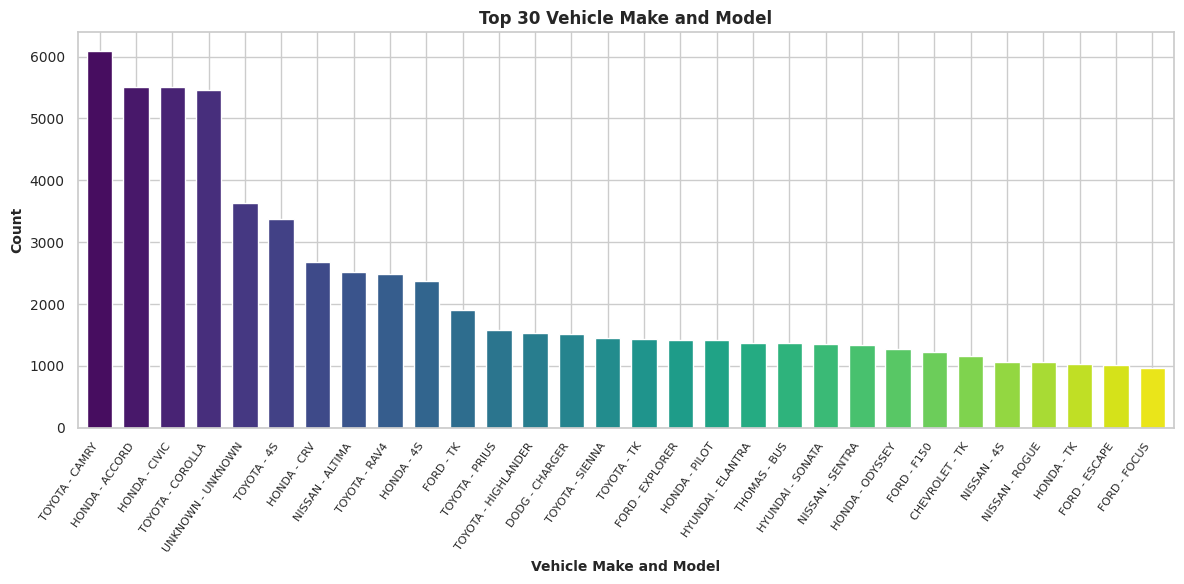

In [32]:
make_model=df.groupby(["Vehicle_Make","Vehicle_Model"]).size().nlargest(30)
make_model_df=make_model.reset_index(name="Count")
make_model_df['Vehicle_Make_Model'] = make_model_df['Vehicle_Make'] + " - " + make_model_df['Vehicle_Model'] #Creating a new column named 'Vehicle_Make_Model' in the make_model_df df 

sns.set(style="whitegrid")
color = sns.color_palette("viridis", n_colors=len(make_model_df['Vehicle_Make_Model'].unique()) )
make_model_df.plot(kind="bar", x="Vehicle_Make_Model", y="Count",width=0.7, figsize=(12, 6),color=color)

plt.xlabel("Vehicle Make and Model", weight="bold", fontsize="small")
plt.ylabel("Count", weight="bold", fontsize="small")
plt.title("Top 30 Vehicle Make and Model", weight="bold")
plt.xticks(rotation=55, fontsize=8, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()

<Figure size 2000x600 with 0 Axes>

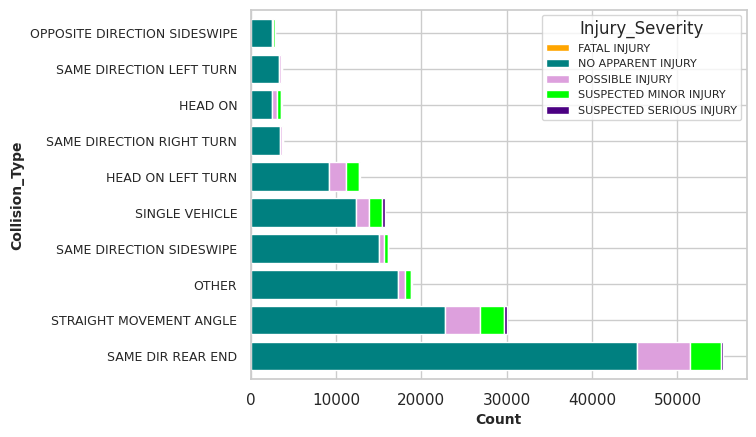

In [33]:
injury_collision_cross_table = pd.crosstab(df["Collision_Type"], df["Injury_Severity"])

limited_index = injury_collision_cross_table.sum(axis=1).nlargest(10).index  # Returning new index

available_index = injury_collision_cross_table.index # Checking available index

limited_index = limited_index.intersection(available_index)# Ensureing limited index is within available index

injury_collision_cross_table_limited = injury_collision_cross_table.loc[limited_index] # Applying limited index to the cross table

#Plotting
plt.figure(figsize=(20, 6))
color = ["orange", "teal", "plum", "lime", "indigo"]
injury_collision_cross_table_limited.plot(kind='barh', width=0.8, stacked=True, color=color)
plt.ylabel('Collision_Type', weight="bold", fontsize="small")
plt.xlabel('Count', weight="bold", fontsize="small")
plt.yticks(fontsize=9)
plt.legend(title='Injury_Severity', fontsize=8)
plt.show()


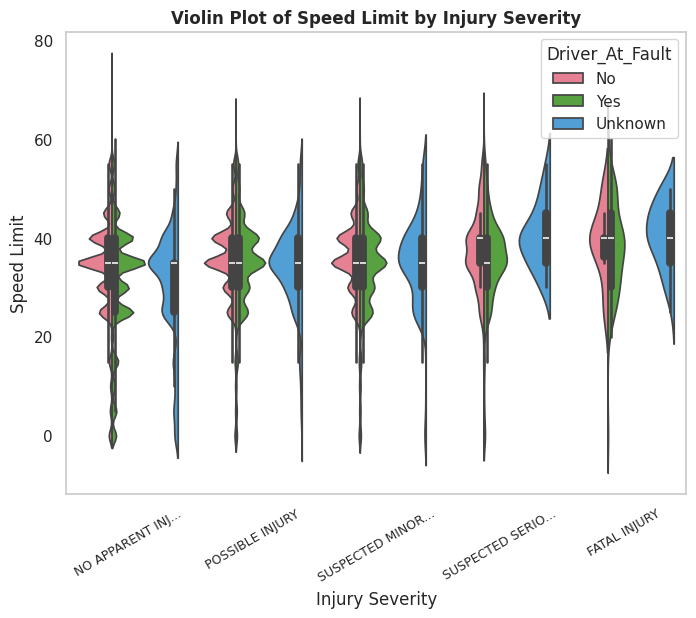

In [34]:

df["Renamed_Injury_Severity"] = df["Injury_Severity"].apply(lambda label: label[:15] + '...' if len(label)>15 else label) #To shorten labels' length 
plt.figure(figsize=(8, 6))
sns.violinplot(x="Renamed_Injury_Severity", y="Speed_Limit", data=df, hue="Driver_At_Fault", palette="husl", split=True)
sns.set_theme(style="white")
plt.grid(False)
plt.title("Violin Plot of Speed Limit by Injury Severity", weight="bold")
plt.xlabel("Injury Severity",fontsize="medium")
plt.xticks(rotation=30, fontsize=9, ha='center')
plt.ylabel("Speed Limit", fontsize="medium")
plt.yticks(fontsize=11)
plt.show()

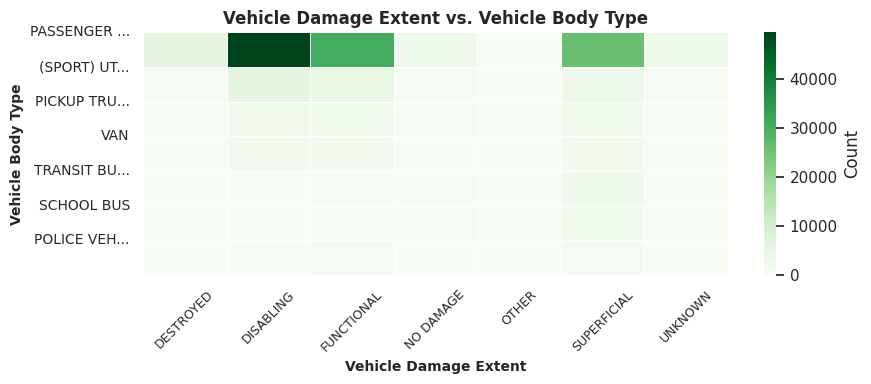

In [35]:
body_damage_cross_tab=pd.crosstab( df['Vehicle_Body_Type'],df['Vehicle_Damage_Extent'])
accessible_index=body_damage_cross_tab.index
short_index=body_damage_cross_tab.sum(axis=1).nlargest(7).index
short_index=short_index.intersection(accessible_index)
body_damage_cross_tab_short=body_damage_cross_tab.loc[short_index]
plt.figure(figsize=(9, 4))
sns.heatmap(body_damage_cross_tab_short, cmap='Greens', annot=False, fmt='.0f', cbar_kws={'label': 'Count'},linewidths=0.7)

y_ticks = [label[:10] + '...' if len(label) > 10 else label for label in body_damage_cross_tab_short.index]
plt.yticks(ticks=range(len(y_ticks)), labels=y_ticks,  fontsize=10,ha="right")
plt.xticks(rotation=45, fontsize=9)
plt.xlabel("Vehicle Damage Extent",fontsize="small", weight="bold")
plt.ylabel("Vehicle Body Type" , fontsize="small",weight="bold")
plt.title('Vehicle Damage Extent vs. Vehicle Body Type', weight="bold")
plt.tight_layout()
plt.show()

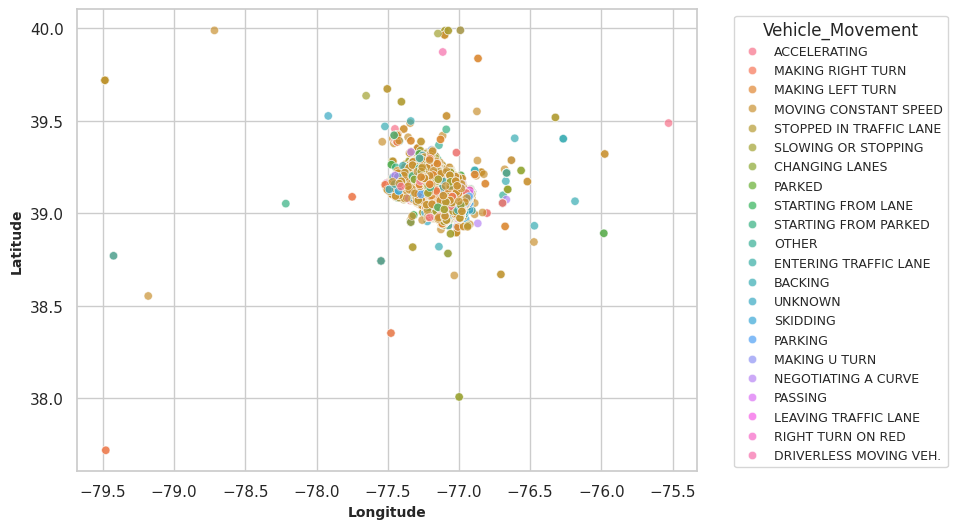

In [40]:
plt.figure(figsize=(8,6))
colors=plt.cm.Set3.colors

sns.scatterplot(x="Longitude",y="Latitude",hue="Vehicle_Movement",data=df,alpha=0.7,color=color)

plt.xlabel("Longitude",weight="bold", fontsize="small")
plt.ylabel("Latitude",weight="bold", fontsize="small")
plt.legend(title="Vehicle_Movement", bbox_to_anchor=(1.05,1),loc="upper left",fontsize=9)
plt.grid(True)
plt.show()